# Part 1 Data Import

In order to analyze the impact of the epidemic on the mobility of Poland and the Netherlands, we will use Google mobility data to study the changes of trips to six different destinations relative to the baseline (traffic volume before the epidemic) during the epidemic, namely Retail & recreation, Grocery & pharmacy, Workplaces, Residential, Parks and Transit stations.

## Part 1.1  Google Community Mobility Data

Data source: Google Community Mobility Reports

https://www.google.com/covid19/mobility/

Report is broken down by location and displays the change in visits to places like grocery stores and parks

In [179]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [111]:
# Import the file contians Community Mobility data of NL and PL

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2020_NL_Region_Mobility_Report.csv"
dfnl_2020 = pd.read_csv(file_path_h, delimiter=',')

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2021_NL_Region_Mobility_Report.csv"
dfnl_2021 = pd.read_csv(file_path_h, delimiter=',')

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2022_NL_Region_Mobility_Report.csv"
dfnl_2022 = pd.read_csv(file_path_h, delimiter=',')

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2020_PL_Region_Mobility_Report.csv"
dfpl_2020 = pd.read_csv(file_path_h, delimiter=',')

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2021_PL_Region_Mobility_Report.csv"
dfpl_2021 = pd.read_csv(file_path_h, delimiter=',')

file_path_h = r"C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\2022_PL_Region_Mobility_Report.csv"
dfpl_2022 = pd.read_csv(file_path_h, delimiter=',')


# append the data
dfnl_m=pd.concat([dfnl_2020,dfnl_2021,dfnl_2022])
dfpl_m=pd.concat([dfpl_2020,dfpl_2021,dfpl_2022])
#Leave the national data in the data, and delete the provincial data
dfnl_m=dfnl_m[dfnl_m['sub_region_1'].isnull().values==True]
dfpl_m=dfpl_m[dfpl_m['sub_region_1'].isnull().values==True]
dfpl_m

C:\Users\17252\AppData\Local\Temp\ipykernel_46608\3585190288.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfnl_2021 = pd.read_csv(file_path_h, delimiter=',')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-15,7.0,-1.0,26.0,4.0,0.0,-1.0
1,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-16,12.0,-13.0,18.0,6.0,-2.0,0.0
2,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-17,6.0,1.0,20.0,1.0,1.0,0.0
3,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-18,3.0,-1.0,13.0,-1.0,1.0,1.0
4,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2020-02-19,5.0,0.0,13.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2022/10/11,7.0,32.0,77.0,12.0,8.0,1.0
284,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2022/10/12,10.0,32.0,76.0,13.0,8.0,1.0
285,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2022/10/13,12.0,36.0,89.0,16.0,8.0,0.0
286,PL,Poland,NaN,NaN,NaN,NaN,NaN,ChIJuwtkpGSZAEcR6lXMScpzdQk,2022/10/14,11.0,34.0,78.0,11.0,-2.0,1.0


In [112]:
# drop useless column
dfnl_m = dfnl_m.drop(['country_region_code','country_region','sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id'], axis=1)
dfpl_m = dfpl_m.drop(['country_region_code','country_region','sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id'], axis=1)

In [113]:
# Change column type to pandas date time of Google Mobility Dataset
dfnl_m.loc[:, 'date'] = pd.to_datetime(dfnl_m.loc[:, 'date'])
dfpl_m.loc[:, 'date'] = pd.to_datetime(dfpl_m.loc[:, 'date'])

# Rename the columns
dfnl_m.columns = ['date', 'NL_retail_and_recreation', 'NL_grocery_and_pharmacy', 'NL_parks', 'NL_transit', 'NL_workplaces', 'NL_residential']
dfpl_m.columns = ['date', 'PL_retail_and_recreation', 'PL_grocery_and_pharmacy', 'PL_parks', 'PL_transit', 'PL_workplaces', 'PL_residential']
dfnl_m

,date,NL_retail_and_recreation,NL_grocery_and_pharmacy,NL_parks,NL_transit,NL_workplaces,NL_residential
0,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0
...,...,...,...,...,...,...,...
283,2022-10-11,-1.0,16.0,60.0,-18.0,-16.0,3.0
284,2022-10-12,-2.0,13.0,53.0,-18.0,-16.0,3.0
285,2022-10-13,-9.0,8.0,11.0,-19.0,-16.0,4.0
286,2022-10-14,-7.0,11.0,30.0,-19.0,-17.0,4.0


In [114]:
df_Mobility_Data = pd.merge(dfnl_m, dfpl_m, on='date')
df_Mobility_Data.set_index('date', inplace=True)
df_Mobility_Data

,NL_retail_and_recreation,NL_grocery_and_pharmacy,NL_parks,NL_transit,NL_workplaces,NL_residential,PL_retail_and_recreation,PL_grocery_and_pharmacy,PL_parks,PL_transit,PL_workplaces,PL_residential
date,,,,,,,,,,,,
2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0,7.0,-1.0,26.0,4.0,0.0,-1.0
2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0,12.0,-13.0,18.0,6.0,-2.0,0.0
2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0,6.0,1.0,20.0,1.0,1.0,0.0
2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0,3.0,-1.0,13.0,-1.0,1.0,1.0
2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0,5.0,0.0,13.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-11,-1.0,16.0,60.0,-18.0,-16.0,3.0,7.0,32.0,77.0,12.0,8.0,1.0
2022-10-12,-2.0,13.0,53.0,-18.0,-16.0,3.0,10.0,32.0,76.0,13.0,8.0,1.0
2022-10-13,-9.0,8.0,11.0,-19.0,-16.0,4.0,12.0,36.0,89.0,16.0,8.0,0.0


## Part 1.2 Covid Data

Data source: WHO Coronavirus (COVID-19) Data
    
https://covid19.who.int/data

In [115]:
# Import the csv file contians data of global daily Daily new confirmed cases per million people  
file_path_h = r'C:\Users\17252\OneDrive - Delft University of Technology\桌面\python final\runshengliu\Daily new confirmed cases per 1M.csv'
df = pd.read_csv(file_path_h, delimiter=',')

# Drop unwanted rows
df_covid = df.loc[((df['location'] == 'Netherlands') | (df['location'] == 'Poland'))]

# Drop unwanted columns
df_covid = df_covid[['location', 'date', 'new_cases', 'new_cases_per_million', 'new_deaths', 'new_deaths_per_million']]
df_covid.loc[:, 'date'] = pd.to_datetime(df_covid.loc[:, 'date'])
df_covid.set_index('date', inplace = True)

df_covid

,location,new_cases,new_cases_per_million,new_deaths,new_deaths_per_million
date,,,,,
2020-02-27,Netherlands,1.0,0.057,NaN,NaN
2020-02-28,Netherlands,5.0,0.285,NaN,NaN
2020-02-29,Netherlands,4.0,0.228,NaN,NaN
2020-03-01,Netherlands,8.0,0.455,NaN,NaN
2020-03-02,Netherlands,6.0,0.342,NaN,NaN
...,...,...,...,...,...
2022-10-26,Poland,1023.0,25.667,23.0,0.577
2022-10-27,Poland,974.0,24.437,22.0,0.552
2022-10-28,Poland,790.0,19.821,12.0,0.301


In [116]:
#df_clear = df_covid.drop(df_covid[df_covid['location']='Poland'].index)
dfpoland=df_covid[~df_covid['location'].isin(['Netherlands'])]
dfpoland=dfpoland.drop(['location', 'new_cases', 'new_deaths'], axis=1)
dfpoland.columns=[ 'new_cases_per_million_pl', 'new_deaths_per_million_pl']

dfnetherland=df_covid[~df_covid['location'].isin(['Poland'])]
dfnetherland=dfnetherland.drop(['location', 'new_cases', 'new_deaths'], axis=1)
dfnetherland.columns=[ 'new_cases_per_million_nl', 'new_deaths_per_million_nl']

df_covid = pd.concat([dfnetherland, dfpoland], axis=1)
df_covid

,new_cases_per_million_nl,new_deaths_per_million_nl,new_cases_per_million_pl,new_deaths_per_million_pl
date,,,,
2020-02-27,0.057,NaN,NaN,NaN
2020-02-28,0.285,NaN,NaN,NaN
2020-02-29,0.228,NaN,NaN,NaN
2020-03-01,0.455,NaN,NaN,NaN
2020-03-02,0.342,NaN,NaN,NaN
...,...,...,...,...
2022-10-26,0.000,0.00,25.667,0.577
2022-10-27,0.000,0.00,24.437,0.552
2022-10-28,370.587,1.48,19.821,0.301


## Part 1.3 Merge data to one dataframe

In [117]:
#df_result =df_covid.join(df_Mobility_Data)
df_Mobility_Data=pd.concat([df_covid, df_Mobility_Data], axis=1)
#df_result=pd.merge(df_Mobility_Data, df_covid, left_index=True, right_index=True)
#print(pd.merge(df1,df2,on='key'))
df_Mobility_Data

,new_cases_per_million_nl,new_deaths_per_million_nl,new_cases_per_million_pl,new_deaths_per_million_pl,NL_retail_and_recreation,NL_grocery_and_pharmacy,NL_parks,NL_transit,NL_workplaces,NL_residential,PL_retail_and_recreation,PL_grocery_and_pharmacy,PL_parks,PL_transit,PL_workplaces,PL_residential
date,,,,,,,,,,,,,,,,
2020-02-15,NaN,NaN,NaN,NaN,1.0,1.0,11.0,3.0,0.0,0.0,7.0,-1.0,26.0,4.0,0.0,-1.0
2020-02-16,NaN,NaN,NaN,NaN,-10.0,-8.0,-31.0,-5.0,-3.0,2.0,12.0,-13.0,18.0,6.0,-2.0,0.0
2020-02-17,NaN,NaN,NaN,NaN,0.0,-1.0,8.0,-3.0,-5.0,1.0,6.0,1.0,20.0,1.0,1.0,0.0
2020-02-18,NaN,NaN,NaN,NaN,5.0,4.0,21.0,-3.0,-5.0,1.0,3.0,-1.0,13.0,-1.0,1.0,1.0
2020-02-19,NaN,NaN,NaN,NaN,3.0,0.0,20.0,-3.0,-5.0,1.0,5.0,0.0,13.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-26,0.000,0.00,25.667,0.577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-27,0.000,0.00,24.437,0.552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-28,370.587,1.48,19.821,0.301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 2 Data Processing

In [180]:
  # delete axis that contains NaN
df_Mobility_Data.dropna(axis=0, how='any', inplace=True)

# Part 3 Data Visualisation

In this part, we will use regression equations to analyze the link between the epidemic data in the Netherlands and Poland and various mobility data to study the impact of the epidemic on the mobility of the two countries.

1.Retail and recreation mobility


Mobility trends for places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters.

In [175]:
# Import a linear regression model 
lrModel_retail_and_recreation_nl = LinearRegression()
#Select independent and dependent variables. Since the toxicity of the virus is constantly changing, simply observing the number of new
#cases cannot accurately reflect the impact of the virus on the population. 
#So we use the number of new deaths to measure the impact of the virus.
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_retail_and_recreation']]
lrModel_retail_and_recreation_nl.fit(x,y)
lrModel_retail_and_recreation_nl.score(x,y)
#View intercept
alpha_retail_and_recreation_nl = lrModel_retail_and_recreation_nl.intercept_[0]

#View slope
beta_retail_and_recreation_nl = lrModel_retail_and_recreation_nl.coef_[0][0]

#Do the same regression analysis on the Polish retail and recreation data
lrModel_retail_and_recreation_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_retail_and_recreation']]
lrModel_retail_and_recreation_pl.fit(x,y)
lrModel_retail_and_recreation_pl.score(x,y)
#View intercept
alpha_retail_and_recreation_pl = lrModel_retail_and_recreation_pl.intercept_[0]

#View slope
beta_retail_and_recreation_pl = lrModel_retail_and_recreation_pl.coef_[0][0]

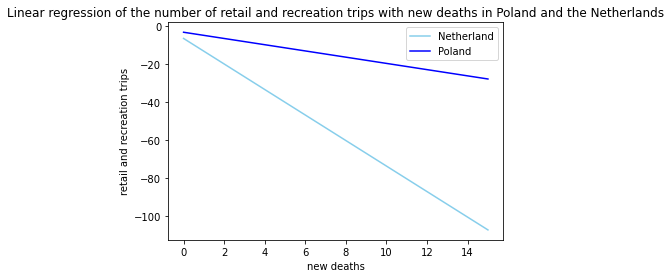

In [177]:
plt.title('Linear regression of the number of retail and recreation trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_retail_and_recreation_nl+beta_retail_and_recreation_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_retail_and_recreation_pl+beta_retail_and_recreation_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('retail and recreation trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on retail and recreation mobility in the Netherlands than on retail and recreation mobility in Poland. The decline in retail and recreation mobility in the Netherlands was more pronounced as the number of deaths increased.

2.Grocery & pharmacy

Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

In [181]:
# Import a linear regression model 
lrModel_grocery_and_pharmacy_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_grocery_and_pharmacy']]
lrModel_grocery_and_pharmacy_nl.fit(x,y)
lrModel_grocery_and_pharmacy_nl.score(x,y)
#View intercept
alpha_grocery_and_pharmacy_nl = lrModel_grocery_and_pharmacy_nl.intercept_[0]

#View slope
beta_grocery_and_pharmacy_nl = lrModel_grocery_and_pharmacy_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_grocery_and_pharmacy_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_grocery_and_pharmacy']]
lrModel_grocery_and_pharmacy_pl.fit(x,y)
lrModel_grocery_and_pharmacy_pl.score(x,y)
#View intercept
alpha_grocery_and_pharmacy_pl = lrModel_grocery_and_pharmacy_pl.intercept_[0]

#View slope
beta_grocery_and_pharmacy_pl = lrModel_grocery_and_pharmacy_pl.coef_[0][0]

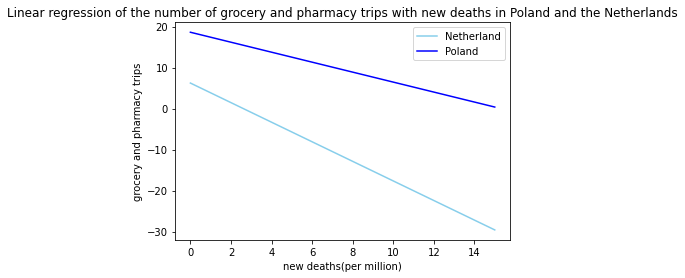

In [182]:
plt.title('Linear regression of the number of grocery and pharmacy trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_grocery_and_pharmacy_nl+beta_grocery_and_pharmacy_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_grocery_and_pharmacy_pl+beta_grocery_and_pharmacy_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('grocery and pharmacy trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on grocery and pharmacy mobility in the Netherlands than on grocery and pharmacy in Poland. The decline in grocery and pharmacy mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce grocery and pharmacy mobility even when the outbreak is not severe.

3.Parks

Mobility trends for places like national
parks, public beaches, marinas, dog parks,
plazas, and public gardens.

In [183]:
# Import a linear regression model 
lrModel_parks_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_parks']]
lrModel_parks_nl.fit(x,y)
lrModel_parks_nl.score(x,y)
#View intercept
alpha_parks_nl = lrModel_parks_nl.intercept_[0]

#View slope
beta_parks_nl = lrModel_parks_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_parks_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_parks']]
lrModel_parks_pl.fit(x,y)
lrModel_parks_pl.score(x,y)
#View intercept
alpha_parks_pl = lrModel_parks_pl.intercept_[0]

#View slope
beta_parks_pl = lrModel_parks_pl.coef_[0][0]

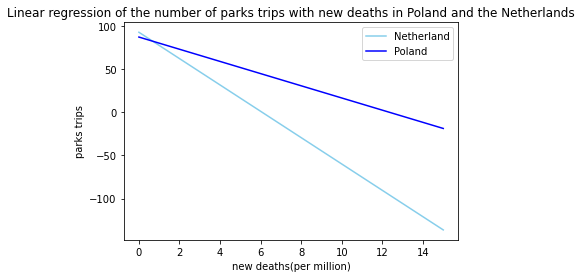

In [184]:
plt.title('Linear regression of the number of parks trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_parks_nl+beta_parks_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_parks_pl+beta_parks_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('parks trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on parks mobility in the Netherlands than on parks in Poland. The decline in parks mobility in the Netherlands was more pronounced as the number of deaths increased.

4.Transit stations

Mobility trends for places like public transport hubs such as subway, bus, and train stations.

In [185]:
# Import a linear regression model 
lrModel_transit_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_transit']]
lrModel_transit_nl.fit(x,y)
lrModel_transit_nl.score(x,y)
#View intercept
alpha_transit_nl = lrModel_transit_nl.intercept_[0]

#View slope
beta_transit_nl = lrModel_transit_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_transit_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_transit']]
lrModel_transit_pl.fit(x,y)
lrModel_transit_pl.score(x,y)
#View intercept
alpha_transit_pl = lrModel_transit_pl.intercept_[0]

#View slope
beta_transit_pl = lrModel_transit_pl.coef_[0][0]

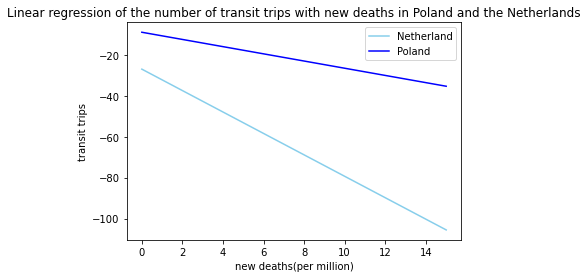

In [186]:
plt.title('Linear regression of the number of transit trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_transit_nl+beta_transit_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_transit_pl+beta_transit_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('transit trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on transit mobility in the Netherlands than on transit in Poland. The decline in transit mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce transit mobility even when the outbreak is not severe.

5.Workplaces

Mobility trends for places of work

In [187]:
# Import a linear regression model 
lrModel_workplaces_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_workplaces']]
lrModel_workplaces_nl.fit(x,y)
lrModel_workplaces_nl.score(x,y)
#View intercept
alpha_workplaces_nl = lrModel_workplaces_nl.intercept_[0]

#View slope
beta_workplaces_nl = lrModel_workplaces_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_workplaces_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_workplaces']]
lrModel_workplaces_pl.fit(x,y)
lrModel_workplaces_pl.score(x,y)
#View intercept
alpha_workplaces_pl = lrModel_workplaces_pl.intercept_[0]

#View slope
beta_workplaces_pl = lrModel_workplaces_pl.coef_[0][0]

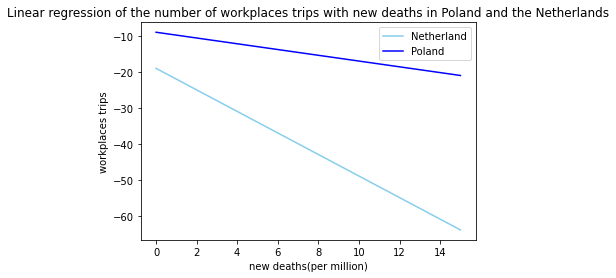

In [188]:
plt.title('Linear regression of the number of workplaces trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_workplaces_nl+beta_workplaces_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_workplaces_pl+beta_workplaces_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('workplaces trips')
plt.show()

According to the regression equation, it can be seen that the epidemic has a greater impact on workplaces mobility in the Netherlands than on workplaces in Poland. The decline in workplaces mobility in the Netherlands was more pronounced as the number of deaths increased. And the Netherlands also has a smaller intercept, meaning people tend to reduce workplaces mobility even when the outbreak is not severe.

6.Residential

Mobility trends for places of residence.

In [190]:
# Import a linear regression model 
lrModel_residential_nl = LinearRegression()
#Select independent and dependent variables. 
x = df_Mobility_Data[['new_deaths_per_million_nl']]
y = df_Mobility_Data[['NL_residential']]
lrModel_residential_nl.fit(x,y)
lrModel_residential_nl.score(x,y)
#View intercept
alpha_residential_nl = lrModel_residential_nl.intercept_[0]

#View slope
beta_residential_nl = lrModel_residential_nl.coef_[0][0]

#Do the same regression analysis on the Polish data
lrModel_residential_pl = LinearRegression()

x = df_Mobility_Data[['new_deaths_per_million_pl']]
y = df_Mobility_Data[['PL_residential']]
lrModel_residential_pl.fit(x,y)
lrModel_residential_pl.score(x,y)
#View intercept
alpha_residential_pl = lrModel_residential_pl.intercept_[0]

#View slope
beta_residential_pl = lrModel_residential_pl.coef_[0][0]

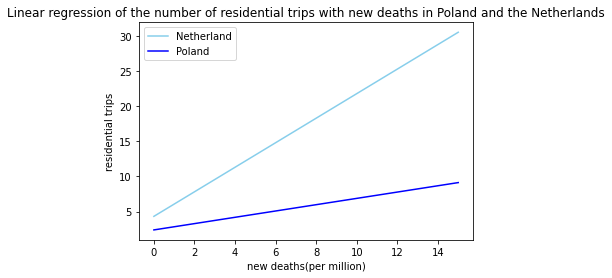

In [191]:
plt.title('Linear regression of the number of residential trips with new deaths in Poland and the Netherlands')
x1=np.linspace(0,15)
plt.plot(x1, alpha_residential_nl+beta_residential_nl*x1, color='skyblue', label='Netherland')
plt.plot(x1, alpha_residential_pl+beta_residential_pl*x1, color='blue', label='Poland')
plt.legend()
 
plt.xlabel('new deaths(per million)')
plt.ylabel('residential trips')
plt.show()

According to the regression equation, the impact of the epidemic on residential mobility in the Netherlands is greater than the impact of the epidemic on residential mobility in Poland. The upward trend in residential mobility in the Netherlands is even more pronounced as the death toll rises. Together, the above analysis shows that there is indeed a relationship between COVID and mobility. Also, traffic volumes in wealthier countries (eg the Netherlands) fell/rising more than in less wealthy countries (eg Poland). This study shows the impact of COVID-19 on liquidity in countries across different wealth classes.